<a href="https://colab.research.google.com/github/Nikitha1418/info5082/blob/main/Data_Cleaning_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mat

In [ ]:
data_df = pd.read_csv("/content/reviews.csv")

In [ ]:
data_df

#EXPLORATORY DATA ANALYSIS

In [ ]:
data_df.isnull()

,Name,Reviews,Ratings
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3747,False,False,False
3748,False,False,False
3749,False,False,False
3750,False,False,False


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     3752 non-null   object
 1   Reviews  3752 non-null   object
 2   Ratings  3752 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 88.1+ KB


In [ ]:
data_df.describe()

,Ratings
count,3752.000000
mean,3.673241
std,1.560253
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


#Data Cleaning

In [ ]:
#Removal of special characters:
import re
data_df['cleaned_data'] = data_df['Reviews'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

In [ ]:
#Convert to lower case
data_df['cleaned_data'] = data_df['cleaned_data'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [ ]:
#remove numbers
data_df['cleaned_data'] = data_df['cleaned_data'].str.replace('\d+', '')

In [ ]:
import nltk
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Removing stopwords by using stopwordslist

stop = stopwords.words('english')
data_df['cleaned_data'] = data_df['cleaned_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
data_df

,Name,Reviews,Ratings,cleaned_data
0,Xiaomi-Band-Wristband-Magnetic-Bluetooth,TLDR: After owning a $150 FitBit and a $35 L...,5,tldr owning fitbit letsfit tracker blows water...
1,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"It's just mandarin, english, russian and spa...",1,mandarin english russian spanish global global...
2,Xiaomi-Band-Wristband-Magnetic-Bluetooth,I’m a Xiaomi fan so I may be a little lenien...,3,xiaomi fan may little lenient less harsh opini...
3,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Love it so much!I mainly just need something...,5,love much mainly need something tracks steps a...
4,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"I paired this with my iPhone, my S7 and my M...",4,paired iphone mi like general example use take...
...,...,...,...,...
3747,Fitpolo-Trackers-Waterproof,I love it,5,love
3748,Fitpolo-Trackers-Waterproof,Love this watch,5,love watch
3749,Fitpolo-Trackers-Waterproof,This fitness tracker is cool and foolproof w...,5,fitness tracker cool foolproof large number de...
3750,Fitpolo-Trackers-Waterproof,One of the best part of this watch is it’s h...,5,one best part watch heart rate accurate long l...


#Exploratory data analysis

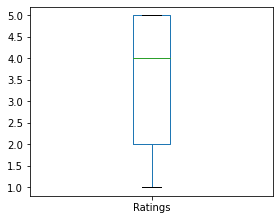

In [ ]:
data_df.plot(kind = 'box', subplots = True , layout = (4,4) , sharex = False , figsize = ( 20 , 16 ))
mat.pyplot.show(block=False)

In [ ]:
import seaborn as sns

In [ ]:
avg_ratings = data_df.groupby('Name').aggregate({'Ratings':'mean'})
avg_ratings = avg_ratings.reset_index()

In [ ]:
avg_ratings

,Name,Ratings
0,BIGGERFIVE-Fitness-Activity,3.973684
1,Fitbit-Fitness-Activity,2.634000
2,Fitbit-Inspire-Fitness,3.079000
3,Fitness-Tracker-Activity-Pedometer-Bracelet,4.257732
4,Fitpolo-Trackers-Waterproof,4.329810
5,Huawei-Activity-Bangle,3.375000
6,LETSCOM-Resistant-Activity,3.882000
7,Xiaomi-Band-Wristband-Magnetic-Bluetooth,4.227273
8,YAMAY-Fitness-Waterproof,4.422000


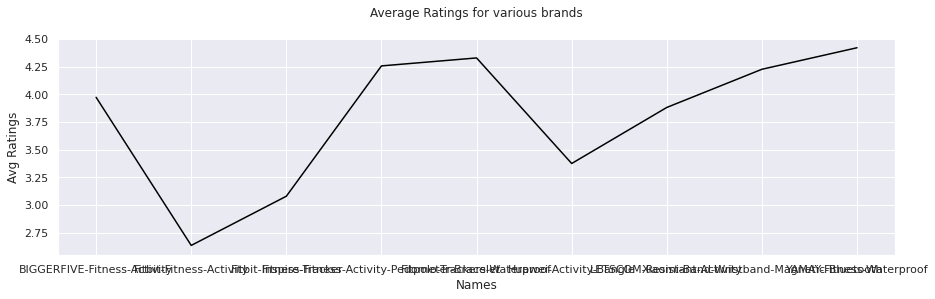

In [ ]:
sns.set()
mat.pyplot.figure(figsize=(15, 4))
ax = sns.lineplot(x='Name', y='Ratings', data=avg_ratings, n_boot=1000, seed = 10,
legend ='brief', color = 'black')
ax.set(xticks=avg_ratings['Name'].values)
mat.pyplot.xlabel("Names")
mat.pyplot.ylabel("Avg Ratings")
mat.pyplot.title("Average Ratings for various brands\n")
mat.pyplot.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats
print(data_df)
print(data_df.shape[1])
# reviews_df = list()
df = data_df['cleaned_data']

reviews =  [TextBlob(df[i]).pos_tags for i in range(data_df['cleaned_data'].shape[0])]



                                          Name  ...                                       cleaned_data
0     Xiaomi-Band-Wristband-Magnetic-Bluetooth  ...  tldr owning fitbit letsfit tracker blows water...
1     Xiaomi-Band-Wristband-Magnetic-Bluetooth  ...  mandarin english russian spanish global global...
2     Xiaomi-Band-Wristband-Magnetic-Bluetooth  ...  xiaomi fan may little lenient less harsh opini...
3     Xiaomi-Band-Wristband-Magnetic-Bluetooth  ...  love much mainly need something tracks steps a...
4     Xiaomi-Band-Wristband-Magnetic-Bluetooth  ...  paired iphone mi like general example use take...
...                                        ...  ...                                                ...
3747               Fitpolo-Trackers-Waterproof  ...                                               love
3748               Fitpolo-Trackers-Waterproof  ...                                         love watch
3749               Fitpolo-Trackers-Waterproof  ...  fitness tracker cool

In [ ]:
reviews_df = pd.DataFrame({'cleaned_data':reviews})
word_counts = [] 
pos_counts = {}


In [ ]:
reviews_df

,cleaned_data
0,"[(tldr, NN), (owning, VBG), (fitbit, NN), (let..."
1,"[(mandarin, NN), (english, JJ), (russian, JJ),..."
2,"[(xiaomi, JJ), (fan, NN), (may, MD), (little, ..."
3,"[(love, RB), (much, RB), (mainly, RB), (need, ..."
4,"[(paired, VBN), (iphone, NN), (mi, NN), (like,..."
...,...
3747,"[(love, NN)]"
3748,"[(love, NN), (watch, NN)]"
3749,"[(fitness, NN), (tracker, NN), (cool, NN), (fo..."
3750,"[(one, CD), (best, JJS), (part, NN), (watch, V..."


In [ ]:
import numpy as np
for review in reviews_df[u'cleaned_data']:
    word_counts.append(len(review))
    for tag in review:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            

print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per review: ', np.mean(word_counts))

Total number of words:  196878
Mean number of words per review:  52.4728144989339


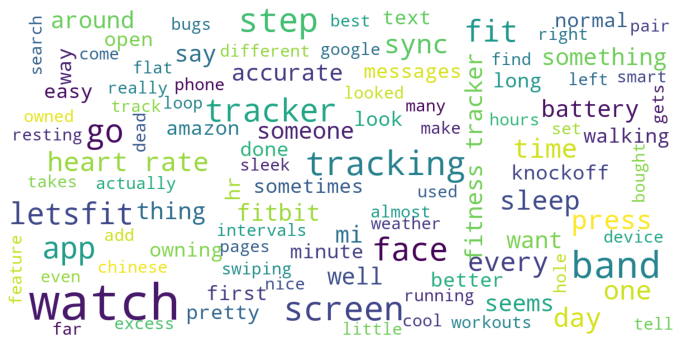

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df[0])

In [ ]:
data_df

,Name,Reviews,Ratings,cleaned_data
0,Xiaomi-Band-Wristband-Magnetic-Bluetooth,TLDR: After owning a $150 FitBit and a $35 L...,5,tldr owning fitbit letsfit tracker blows water...
1,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"It's just mandarin, english, russian and spa...",1,mandarin english russian spanish global global...
2,Xiaomi-Band-Wristband-Magnetic-Bluetooth,I’m a Xiaomi fan so I may be a little lenien...,3,xiaomi fan may little lenient less harsh opini...
3,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Love it so much!I mainly just need something...,5,love much mainly need something tracks steps a...
4,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"I paired this with my iPhone, my S7 and my M...",4,paired iphone mi like general example use take...
...,...,...,...,...
3747,Fitpolo-Trackers-Waterproof,I love it,5,love
3748,Fitpolo-Trackers-Waterproof,Love this watch,5,love watch
3749,Fitpolo-Trackers-Waterproof,This fitness tracker is cool and foolproof w...,5,fitness tracker cool foolproof large number de...
3750,Fitpolo-Trackers-Waterproof,One of the best part of this watch is it’s h...,5,one best part watch heart rate accurate long l...


In [ ]:
types_of_trackers = data_df["Name"].unique().tolist()

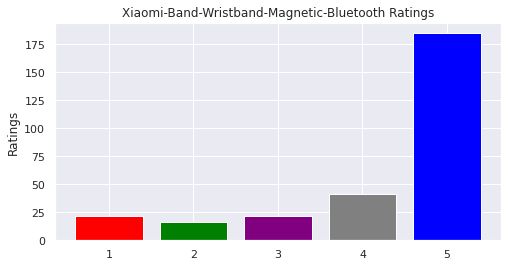

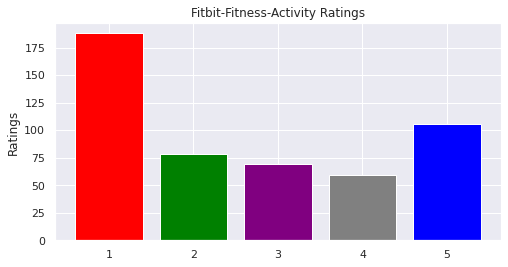

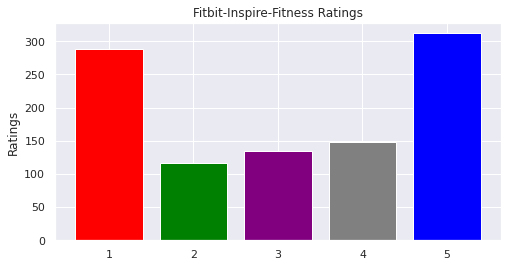

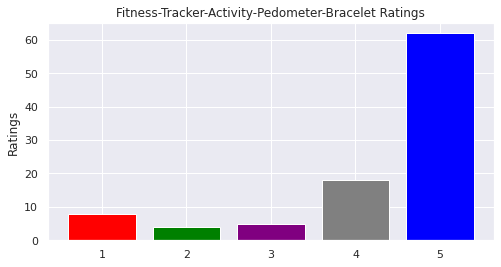

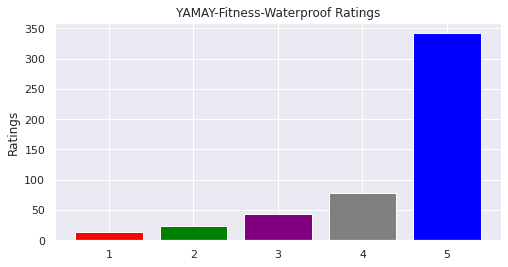

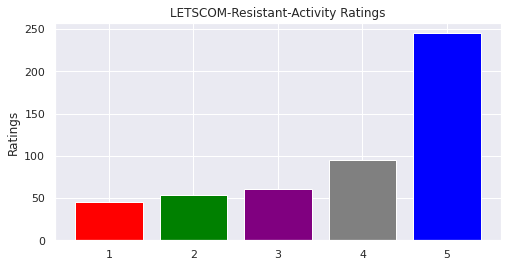

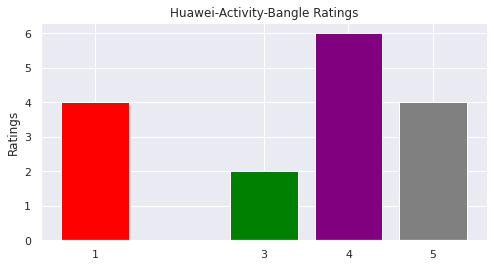

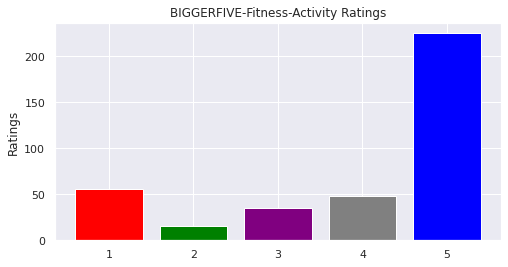

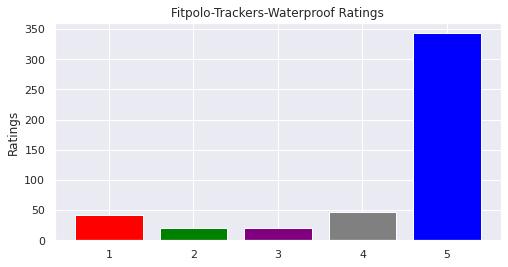

In [ ]:
for i in types_of_trackers:
  track = data_df[data_df["Name"]==i]['Ratings'].to_frame()
  track["counts"] = 1
  track = track.groupby('Ratings').aggregate({'counts':'count'}).reset_index()
  fig, ax = plt.subplots(figsize=(8,4))
  ax.bar(track["Ratings"], track["counts"],color=['Red','green','purple','grey','blue']);
  ax.set_xticks(track["Ratings"]);
  ax.set_xticklabels(track["Ratings"]);
  ax.set_title(i+' Ratings');
  ax.set_ylabel('Ratings');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


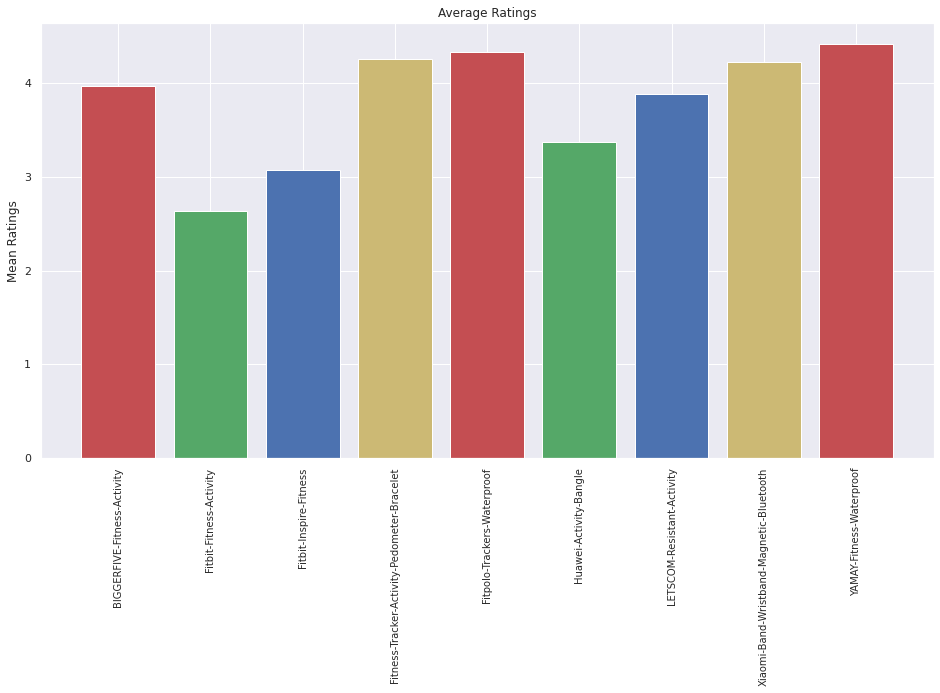

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(avg_ratings["Name"], avg_ratings["Ratings"], color="rgby");
ax.set_xticks(avg_ratings["Name"]);
ax.set_xticklabels(avg_ratings["Name"],fontsize=10, rotation='vertical');
ax.set_title("Average Ratings");
ax.set_ylabel('Mean Ratings');

In [ ]:
def type_of_review(val):
  if(int(val)>3):
    return "good"
  elif(int(val)==3):
    return "neutral"
  else:
    return "bad"
  pass

In [ ]:

data_df["Sentiment"] = data_df["Ratings"].apply(lambda x : type_of_review(x))

In [ ]:
def combined_features(row):
    return row['Name'] + ' '+ row['Reviews']
data_df['all_features'] = data_df.apply(combined_features, axis=1)

In [ ]:
X = data_df['all_features']
y = data_df['Sentiment']

#**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver = 'lbfgs',max_iter = 500,fit_intercept=True)
model.fit(ctmTr, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_class = model.predict(X_test_dtm)

In [ ]:
y_pred_class

array(['good', 'neutral', 'good', ..., 'neutral', 'good', 'neutral'],
      dtype=object)

In [ ]:
accuracy_score(y_test, y_pred_class)

0.7921108742004265

#**Machine learning**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer

#create a stemmer
stemmer = SnowballStemmer("english")


#define our own tokenizing function that we will pass into the TFIDFVectorizer. We will also stem the words here.
def tokens(x):
    x = x.split()
    stems = []
    [stems.append(stemmer.stem(word)) for word in x]
    return stems

vectorizer = TfidfVectorizer(tokenizer = tokens, stop_words = 'english', ngram_range=(1, 1), min_df = 0.01)
features = vectorizer.fit_transform(data_df['Reviews'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, data_df["Sentiment"], test_size=0.5, random_state=42)

In [ ]:

# Import the supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Initialize the models using a random state were applicable.
clf_list = [GaussianNB(), 
            AdaBoostClassifier(random_state = 30), 
            RandomForestClassifier(random_state = 30), 
            LogisticRegression(random_state = 30),
            DecisionTreeClassifier(random_state = 30)]
x_tr = X_train.toarray()
x_te = X_test.toarray()


# Set up the training set sizes for 100, 200 and 300 respectively.
train_feature_list = [x_tr[0:1876]]
train_target_list = [y_train[0:1876]]

results = list()
# Execute the 'train_predict' function for each of the classifiers and each training set size
for clf in clf_list:
    for a, b in zip(train_feature_list, train_target_list):
        clf.fit(a, b)
        y_pred = clf.predict(x_te)
        results.append(accuracy_score(y_test, y_pred))

Algos = ["GaussianNB","AdaBoostClassifier","RandomForestClassifier","LogisticRegression","DecisionTreeClassifier"]

for i in range(0,len(Algos)):
  print(Algos[i],"  accuracy is   :",results[i])
        

GaussianNB   accuracy is   : 0.4690831556503198
AdaBoostClassifier   accuracy is   : 0.7233475479744137
RandomForestClassifier   accuracy is   : 0.7745202558635395
LogisticRegression   accuracy is   : 0.7899786780383795
DecisionTreeClassifier   accuracy is   : 0.6412579957356077


#**SENTIMENT ANALYSIS**

In [ ]:

sentiment_df = data_df[["Name","Reviews","cleaned_data","Ratings","Sentiment"]]

In [ ]:
sentiment_df

,Name,Reviews,cleaned_data,Ratings,Sentiment
0,Xiaomi-Band-Wristband-Magnetic-Bluetooth,TLDR: After owning a $150 FitBit and a $35 L...,tldr owning fitbit letsfit tracker blows water...,5,good
1,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"It's just mandarin, english, russian and spa...",mandarin english russian spanish global global...,1,bad
2,Xiaomi-Band-Wristband-Magnetic-Bluetooth,I’m a Xiaomi fan so I may be a little lenien...,xiaomi fan may little lenient less harsh opini...,3,neutral
3,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Love it so much!I mainly just need something...,love much mainly need something tracks steps a...,5,good
4,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"I paired this with my iPhone, my S7 and my M...",paired iphone mi like general example use take...,4,good
5,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"Great smart band, the product is well design...",great smart band product well designed functio...,5,good
6,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Works great except when I try the freestyle ...,works great except try freestyle workout mode ...,3,neutral
7,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"It is a great piece of tracking equipment, I...",great piece tracking equipment wear nice watch...,5,good
8,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Well only had it two weeks. Came undone rand...,well two weeks came undone randomly three time...,1,bad
9,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Junk. Bought for sleep tracking and it track...,junk bought sleep tracking tracks nothing miss...,1,bad


In [ ]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
import nltk
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
def sentiments(ip):
  blob_object = TextBlob(ip, analyzer=NaiveBayesAnalyzer())
  return blob_object.sentiment


In [ ]:
sentiment_df["new_sentiment"] = sentiment_df["cleaned_data"].apply(lambda x: sentiments(x))

In [ ]:
sentiment_df

,Name,Reviews,cleaned_data,Ratings,Sentiment,new_sentiment
0,Xiaomi-Band-Wristband-Magnetic-Bluetooth,TLDR: After owning a $150 FitBit and a $35 L...,tldr owning fitbit letsfit tracker blows water...,5,good,"(pos, 0.9999995126774143, 4.873225958380809e-07)"
1,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"It's just mandarin, english, russian and spa...",mandarin english russian spanish global global...,1,bad,"(pos, 0.9894876319569249, 0.010512368043077395)"
2,Xiaomi-Band-Wristband-Magnetic-Bluetooth,I’m a Xiaomi fan so I may be a little lenien...,xiaomi fan may little lenient less harsh opini...,3,neutral,"(pos, 0.9945864698577637, 0.005413530142221735)"
3,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Love it so much!I mainly just need something...,love much mainly need something tracks steps a...,5,good,"(pos, 0.9707324161429082, 0.02926758385709185)"
4,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"I paired this with my iPhone, my S7 and my M...",paired iphone mi like general example use take...,4,good,"(pos, 0.9448484320334675, 0.055151567966536315)"
5,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"Great smart band, the product is well design...",great smart band product well designed functio...,5,good,"(neg, 0.4832517558695721, 0.5167482441304236)"
6,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Works great except when I try the freestyle ...,works great except try freestyle workout mode ...,3,neutral,"(pos, 0.9996067365224075, 0.0003932634775917917)"
7,Xiaomi-Band-Wristband-Magnetic-Bluetooth,"It is a great piece of tracking equipment, I...",great piece tracking equipment wear nice watch...,5,good,"(pos, 0.9006859679863615, 0.09931403201364321)"
8,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Well only had it two weeks. Came undone rand...,well two weeks came undone randomly three time...,1,bad,"(pos, 0.6340843476664003, 0.3659156523335955)"
9,Xiaomi-Band-Wristband-Magnetic-Bluetooth,Junk. Bought for sleep tracking and it track...,junk bought sleep tracking tracks nothing miss...,1,bad,"(neg, 0.08388196666404077, 0.9161180333359645)"
